Study Various Feature extraction techniques to extract the Image Descriptors

1. HoG
2. LBP Texture
3. Color Histogram
4. Hu Moments and Zernlike Moments
5. Haralick Textures

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import cv2
import mahotas
from skimage import feature
import numpy as np
import mahotas as mt


In [2]:
# reading the dataset

dataset = pd.read_csv("E:\Final_Year_Project\Implementation\Image-Text-NN-SC-Detection\Analysis\HAM10000_metadata.csv")
dataset.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [3]:
# The diesease- dx is made into a more human readable format of which type of skin cancer cell it is
lesion_type_dict = {
                    'nv': 'Melanocytic nevi',
                    'mel': 'Melanoma',
                    'bkl': 'Benign keratosis-like lesions ',
                    'bcc': 'Basal cell carcinoma',
                    'akiec': 'Actinic keratoses',
                    'vasc': 'Vascular lesions',
                    'df': 'Dermatofibroma'
                    }

dataset['cell_type'] = dataset['dx'].map(lesion_type_dict.get) 
dataset['cell_type_idx'] = pd.Categorical(dataset['cell_type']).codes


    
localization_type_dict = {'abdomen': 50,
                            'acral': 100,
                            'back': 150,
                            'chest': 200,
                            'ear': 250,
                            'face': 51,
                            'foot': 101,
                            'genital': 151,
                            'hand': 201,
                            'lower extremity': 251,
                            'neck': 52,
                            'scalp': 102,
                            'trunk': 152,
                            'unknown': 202,
                            'upper extremity': 252}

gender_type_dict = {'male': 25,
                    'female': 50}

dataset['Feature_1'] = dataset['localization'].map(localization_type_dict.get) 
dataset['Feature_2'] = dataset['sex'].map(gender_type_dict.get)

dataset.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,cell_type,cell_type_idx,Feature_1,Feature_2
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2,102,25.0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2,102,25.0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2,102,25.0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2,102,25.0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,Benign keratosis-like lesions,2,250,25.0


In [4]:
# imputation with median values as we have an ordinal variable age, and less sensitive to extremes
dataset["age"].fillna(dataset.age.median(), inplace = True)

In [5]:
# Define image path

base_skin_dir = os.path.join("..","Data")
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir,'*','*.jpg'))}

dataset['path'] = dataset['image_id'].map(imageid_path_dict.get)
dataset.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,cell_type,cell_type_idx,Feature_1,Feature_2,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2,102,25.0,..\Data\HAM10000_images_part_1\ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2,102,25.0,..\Data\HAM10000_images_part_1\ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2,102,25.0,..\Data\HAM10000_images_part_1\ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2,102,25.0,..\Data\HAM10000_images_part_1\ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,Benign keratosis-like lesions,2,250,25.0,..\Data\HAM10000_images_part_2\ISIC_0031633.jpg


In [6]:
# loading into dataframe
dataset['image'] = dataset['path'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))

In [7]:
dataset.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,cell_type,cell_type_idx,Feature_1,Feature_2,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2,102,25.0,..\Data\HAM10000_images_part_1\ISIC_0027419.jpg,"[[[190, 153, 194], [192, 154, 196], [191, 153,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2,102,25.0,..\Data\HAM10000_images_part_1\ISIC_0025030.jpg,"[[[23, 13, 22], [24, 14, 24], [25, 14, 28], [3..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2,102,25.0,..\Data\HAM10000_images_part_1\ISIC_0026769.jpg,"[[[185, 127, 137], [189, 133, 147], [194, 136,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,Benign keratosis-like lesions,2,102,25.0,..\Data\HAM10000_images_part_1\ISIC_0025661.jpg,"[[[24, 11, 17], [26, 13, 22], [38, 21, 32], [5..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,Benign keratosis-like lesions,2,250,25.0,..\Data\HAM10000_images_part_2\ISIC_0031633.jpg,"[[[134, 90, 113], [147, 102, 125], [159, 115, ..."


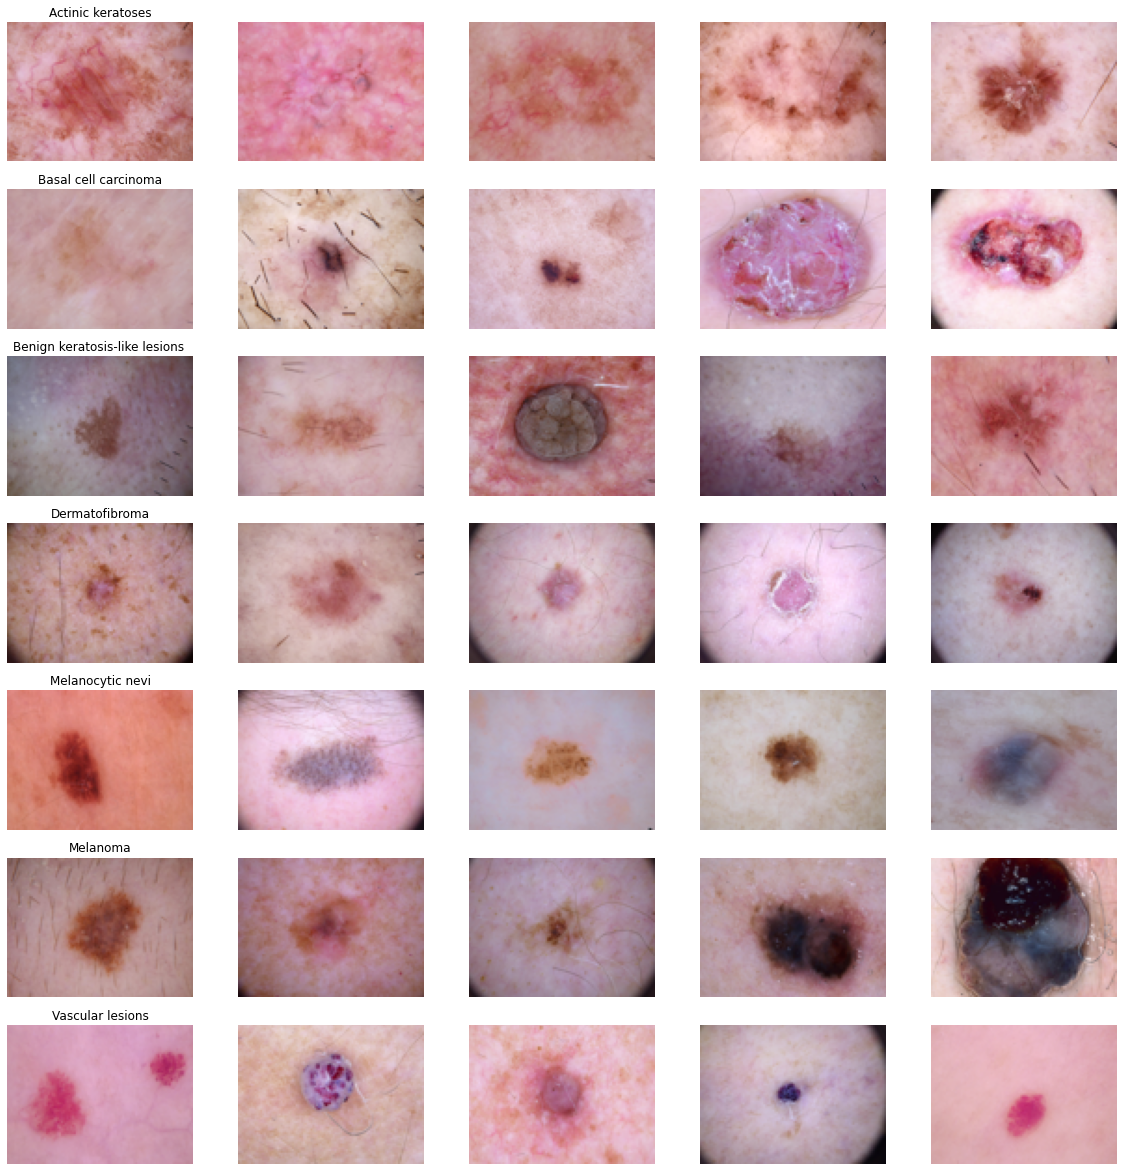

In [8]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, dataset.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

 Load Samples from each class

In [9]:
# load sample class images into a temporary dataset
temp = dataset.groupby('cell_type').sample(n=10, random_state=1)
temp.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,cell_type,cell_type_idx,Feature_1,Feature_2,path,image
9745,HAM_0001337,ISIC_0032455,akiec,histo,80.0,male,upper extremity,rosendahl,Actinic keratoses,0,252,25.0,..\Data\HAM10000_images_part_2\ISIC_0032455.jpg,"[[[170, 118, 127], [172, 117, 128], [174, 120,..."
9948,HAM_0007622,ISIC_0027562,akiec,histo,60.0,female,face,rosendahl,Actinic keratoses,0,51,50.0,..\Data\HAM10000_images_part_1\ISIC_0027562.jpg,"[[[185, 137, 143], [187, 138, 145], [185, 132,..."
9964,HAM_0001903,ISIC_0026984,akiec,histo,50.0,male,face,rosendahl,Actinic keratoses,0,51,25.0,..\Data\HAM10000_images_part_1\ISIC_0026984.jpg,"[[[151, 105, 105], [152, 105, 106], [155, 109,..."
9912,HAM_0000909,ISIC_0031286,akiec,histo,55.0,male,lower extremity,rosendahl,Actinic keratoses,0,251,25.0,..\Data\HAM10000_images_part_2\ISIC_0031286.jpg,"[[[239, 189, 198], [239, 194, 200], [241, 195,..."
9807,HAM_0002705,ISIC_0025089,akiec,histo,65.0,male,scalp,rosendahl,Actinic keratoses,0,102,25.0,..\Data\HAM10000_images_part_1\ISIC_0025089.jpg,"[[[203, 157, 168], [204, 156, 167], [207, 155,..."


In [10]:
def view_image(image: object):
    plt.imshow(image)
    
def image_shape(image: object):
    return image.shape

def get_hu_moments(dataset, image):
    gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
    gray = gray(image)  

    return cv2.HuMoments(cv2.moments(gray)).flatten()

def get_hog(_dataset, image, _wind_size, _orientations):
    
    """generate Histogram of gradients as a feature vector for an given image """
    
    fd, hog_image = hog(image, orientations=_orientations, pixels_per_cell=(_wind_size, _wind_size),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1, feature_vector=True)
    
    return fd, hog_image


def build_histogram(image, _axs,bins=256):
    # convert from BGR to RGB
    rgb_image = np.flip(image, 2)
    # show the image
    #plt.imshow(rgb_image)
    # convert to a vector
    image_vector = rgb_image.reshape(1, -1, 3)
    # break into given number of bins
    div = 256 / bins
    bins_vector = (image_vector / div).astype(int)
    # get the red, green, and blue channels
    red = bins_vector[0, :, 0]
    green = bins_vector[0, :, 1]
    blue = bins_vector[0, :, 2]
    # build the histograms and display
    _axs.hist(red, bins=bins, color='r')
    _axs.hist(green, bins=bins, color='g')
    _axs.hist(blue, bins=bins, color='b')
    
    
    return red, green , blue

In [11]:
# study hog  which pixel size captures best
# study hu moments of samples of images and compare mean and variance between them after appending them to a dataset
# import the necessary packages


def lbp_feature(numPoints, radius, image, eps=1e-7):
    gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114])
    image = gray(image)
    lbp = feature.local_binary_pattern(image, numPoints,
		radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),
		bins=np.arange(0, numPoints + 3),
		range=(0, numPoints + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + eps)
    return hist
  
def haralick_features(image):
        # calculate haralick texture features for 4 types of adjacency
        textures = mt.features.haralick(image)

        # take the mean of it and return it
        ht_mean = textures.mean(axis=0)
        return ht_mean

def generate_text_image(image, f1, f2, f3):
    l,b,h=image.shape# Reshape the pixel values array to match the image dimensions
    image_array = np.zeros((75, 10, 3), dtype=np.uint8)
    image_array[:, :, 0] = f1
    image_array[:, :, 1] = f2
    image_array[:, :, 2] = f3

    return image_array
        
def add_text_feature(image, feature_img_arr):
  
  # Concatenate the images vertically
  concatenated_image = np.concatenate((image, feature_img_arr), axis=1) 
  print(f"Original shape of the image: {image.shape}")
  print(f"New shape of the image: {concatenated_image.shape}")
  
  return concatenated_image


In [12]:
# get the set of classes
classes = list(set(dataset['cell_type']))
print(f"Set of Target Classes: {classes}")    

Set of Target Classes: ['Basal cell carcinoma', 'Vascular lesions', 'Benign keratosis-like lesions ', 'Actinic keratoses', 'Melanocytic nevi', 'Melanoma', 'Dermatofibroma']


### Color Histogram Analysis

Original shape of the image: (75, 100, 3)
New shape of the image: (75, 110, 3)
Original shape of the image: (75, 100, 3)
New shape of the image: (75, 110, 3)
Original shape of the image: (75, 100, 3)
New shape of the image: (75, 110, 3)
Original shape of the image: (75, 100, 3)
New shape of the image: (75, 110, 3)
Original shape of the image: (75, 100, 3)
New shape of the image: (75, 110, 3)
Original shape of the image: (75, 100, 3)
New shape of the image: (75, 110, 3)
Original shape of the image: (75, 100, 3)
New shape of the image: (75, 110, 3)
Original shape of the image: (75, 100, 3)
New shape of the image: (75, 110, 3)
Original shape of the image: (75, 100, 3)
New shape of the image: (75, 110, 3)
Original shape of the image: (75, 100, 3)
New shape of the image: (75, 110, 3)
Original shape of the image: (75, 100, 3)
New shape of the image: (75, 110, 3)
Original shape of the image: (75, 100, 3)
New shape of the image: (75, 110, 3)
Original shape of the image: (75, 100, 3)
New shape 

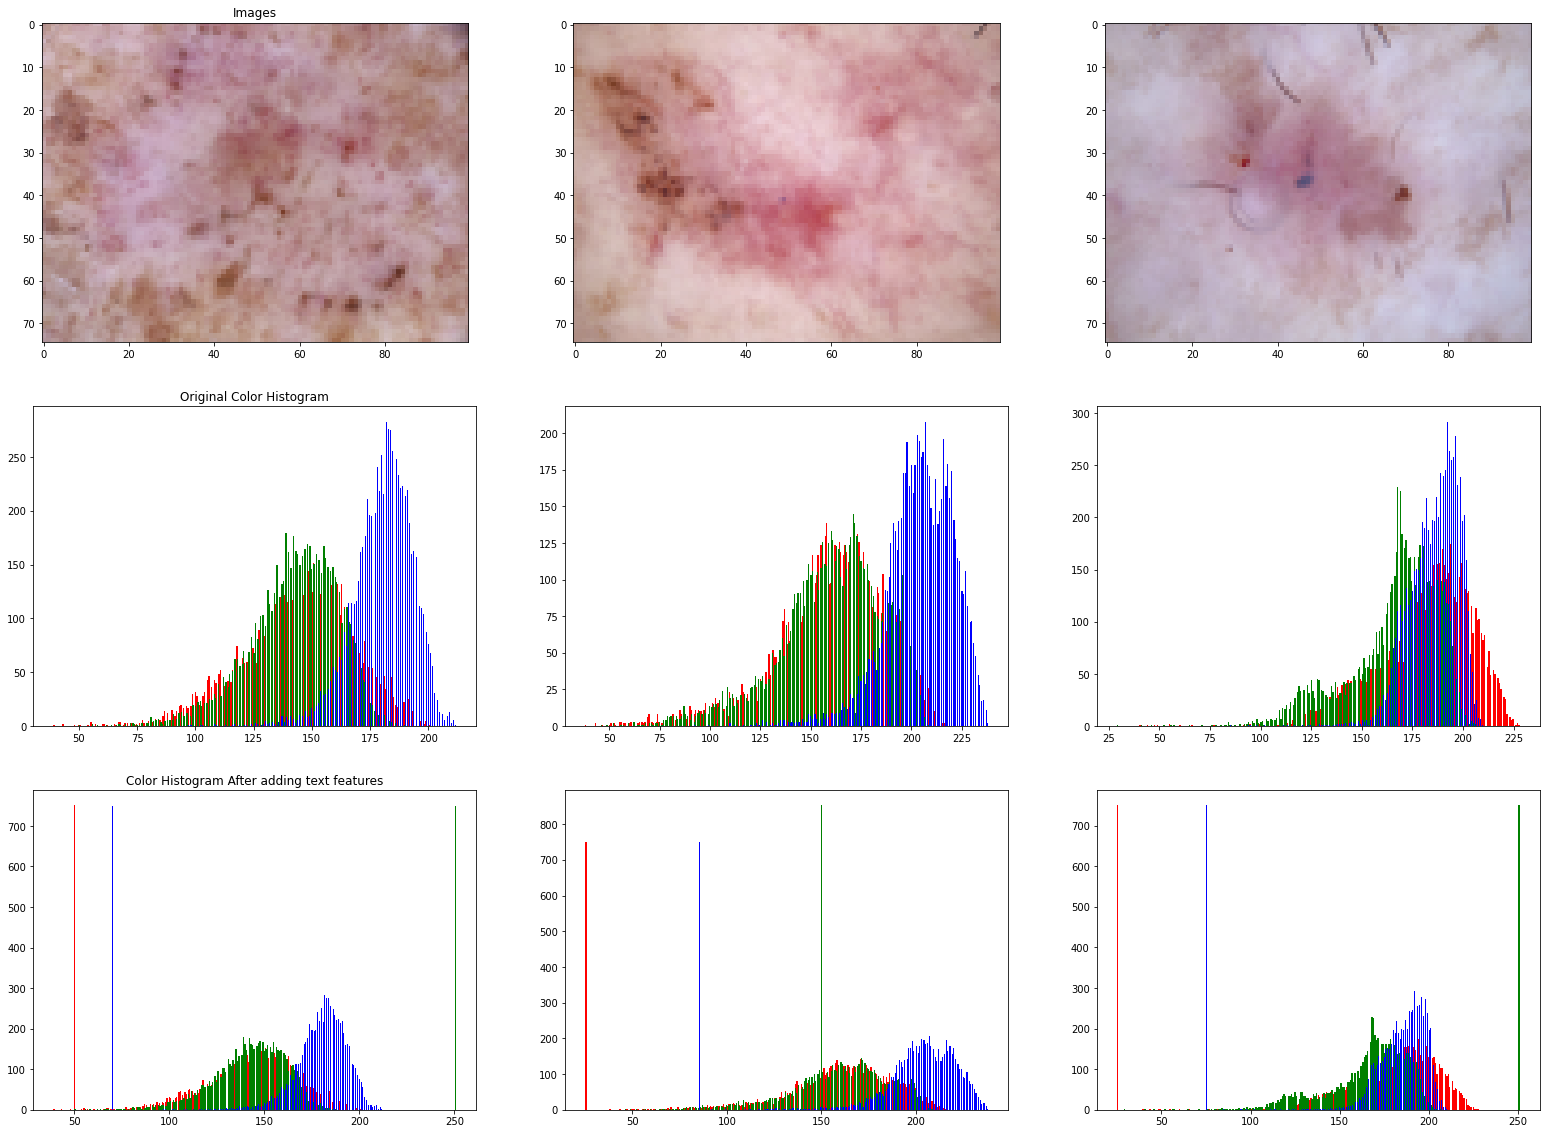

In [15]:
def color_hist_image(dataset, _class):
    res = dataset[dataset['cell_type'] == _class]
    f, axes = plt.subplots(3, 3, figsize=(27, 20))
    
    img1, img2, img3 = res.iloc[0]['image'], res.iloc[3]['image'], res.iloc[6]['image']
    axes[0,0].set_title('Images')
    axes[0,0].imshow(img1)
    axes[0,1].imshow(img2)
    axes[0,2].imshow(img3)
    
    axes[1,0].set_title('Original Color Histogram')
    build_histogram(img1,axes[1,0])
    build_histogram(img2,axes[1,1])
    build_histogram(img3,axes[1,2])
    
    # aadding textual features to the image
    text_img1 = generate_text_image(img1, res.iloc[0]['age'], res.iloc[0]['Feature_1'], res.iloc[0]['Feature_2'] )
    text_img2 = generate_text_image(img2, res.iloc[3]['age'], res.iloc[3]['Feature_1'], res.iloc[3]['Feature_2'] )
    text_img3 = generate_text_image(img1, res.iloc[6]['age'], res.iloc[6]['Feature_1'], res.iloc[6]['Feature_2'] )
    
    new_img1 = add_text_feature(img1, text_img1)
    new_img2 = add_text_feature(img2, text_img2)
    new_img3 = add_text_feature(img3, text_img3)
    
    axes[2,0].set_title('Color Histogram After adding text features')
    build_histogram(new_img1,axes[2,0])
    build_histogram(new_img2,axes[2,1])
    build_histogram(new_img3,axes[2,2])
    
    rept_name = _class + '_color_hist'
    f.savefig(f"Color_Histogram_Analysis/{rept_name}")
    
for _ in classes:
    color_hist_image(temp, _)
